In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from scipy import stats

# Загрузка данных

Загружаем набор данных по цветкам ириса, в нем три класса ириса, по 50 образцов каждый. Каждый образец описан 4 характеристиками: длина чашелистика, ширина чашелистика, длина лепестка, ширина лепестка. 

In [3]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Исходный набор данных представляет из себя словарь, мы соберем из него небольшой датафрейм. Шаг не обязательный, но воспринимать данные приятнее.

In [5]:
# создаем датафрейм с данными о цветках
iris_df = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# добавлем колонку с данными о принадлежности к тому или иному классу
iris_df['сlass'] = iris['target']
iris_df

,sepal_length,sepal_width,petal_length,petal_width,сlass
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Добавим столбец с названием класса
name_dict = {0: 'setosa',
             1: 'versicolor',
             2: 'virginica'}
iris_df['class_name'] = iris_df.сlass.map(name_dict)
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,сlass,class_name
65,6.7,3.1,4.4,1.4,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica
126,6.2,2.8,4.8,1.8,2,virginica
60,5.0,2.0,3.5,1.0,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
21,5.1,3.7,1.5,0.4,0,setosa
83,6.0,2.7,5.1,1.6,1,versicolor
81,5.5,2.4,3.7,1.0,1,versicolor
46,5.1,3.8,1.6,0.2,0,setosa
39,5.1,3.4,1.5,0.2,0,setosa


In [7]:
# Проверим, есть ли пропушенные значения
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
сlass           0
class_name      0
dtype: int64

Посмотрим на распределения признаков и выведем минимальное, среднее и максмальное значение признаков для каждого вида ирисов

<Axes: xlabel='sepal_length', ylabel='Count'>

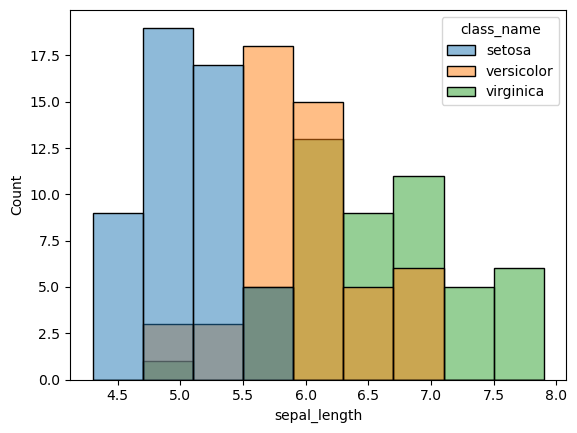

In [8]:
#Распределение длины чашелистика
sns.histplot(data=iris_df, x='sepal_length', hue='class_name')

<Axes: xlabel='sepal_width', ylabel='Count'>

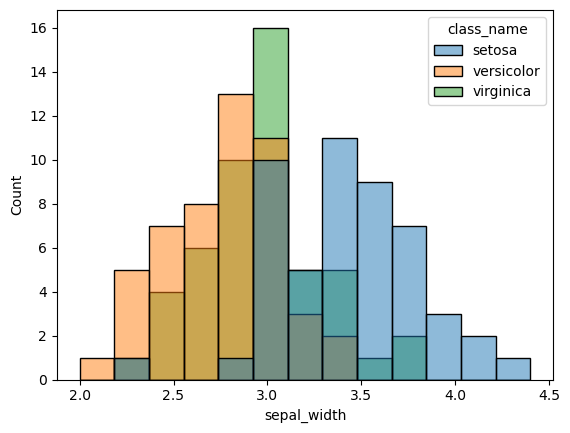

In [9]:
#Распределение ширины чашелистика
sns.histplot(data=iris_df, x='sepal_width', hue='class_name')

<Axes: xlabel='petal_length', ylabel='Count'>

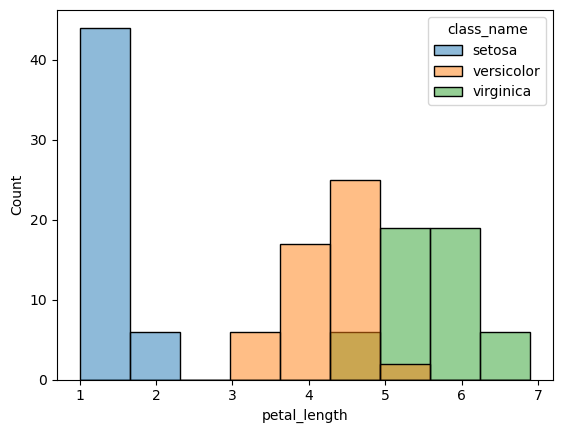

In [10]:
#Распределение длины лепестка
sns.histplot(data=iris_df, x='petal_length', hue='class_name')

<Axes: xlabel='petal_width', ylabel='Count'>

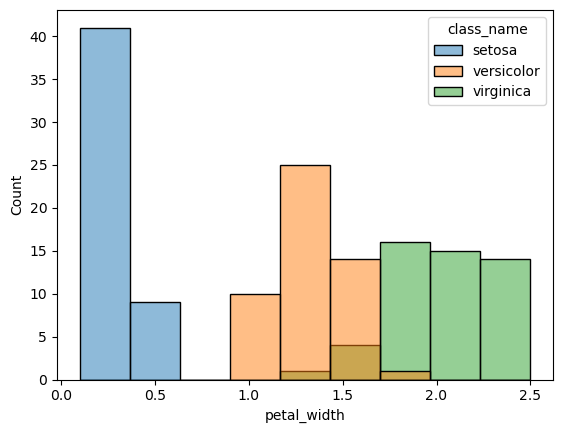

In [11]:
#Распределение ширины лепестка
sns.histplot(data=iris_df, x='petal_width', hue='class_name')

In [12]:
# Найдем максимальные, минимальные и средние значения показателей цветка в каждом классе
iris_df.groupby('class_name').agg({
    'sepal_length': ['min', 'max', 'mean'],
    'sepal_width': ['min', 'max', 'mean'],
    'petal_length': ['min', 'max', 'mean'],
    'petal_width': ['min', 'max', 'mean']
})

sepal_length             sepal_width             petal_length       \
                    min  max   mean         min  max   mean          min  max   
class_name                                                                      
setosa              4.3  5.8  5.006         2.3  4.4  3.428          1.0  1.9   
versicolor          4.9  7.0  5.936         2.0  3.4  2.770          3.0  5.1   
virginica           4.9  7.9  6.588         2.2  3.8  2.974          4.5  6.9   

                  petal_width              
             mean         min  max   mean  
class_name                                 
setosa      1.462         0.1  0.6  0.246  
versicolor  4.260         1.0  1.8  1.326  
virginica   5.552         1.4  2.5  2.026

In [13]:
# Функция для окраски ячеек
def highlight_cells(val):
    color = 'background-color: yellow' if (val > 0.7 or val < -0.7) else ''
    return color

# Проверим, являются ли параметры цветков линейно зависимыми для класса setosa
iris_df.query('сlass == 0')[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].corr().style.map(highlight_cells)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [14]:
# Проверим, являются ли параметры цветков линейно зависимыми для класса versicolor
iris_df.query('сlass == 1')[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].corr().style.map(highlight_cells)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [15]:
# Проверим, являются ли параметры цветков линейно зависимыми для класса virginica
iris_df.query('сlass == 2')[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].corr().style.map(highlight_cells)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [16]:
# Проверим, являются ли параметры цветков линейно зависимыми для всего датафрейма в целом
iris_df[['sepal_length', 'sepal_width',
         'petal_length', 'petal_width']].corr().style.map(highlight_cells)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Видим, исходные данные для классификации имеют сильную линейную зависимость между признаками (мультиколлинеарность), это может влиять на работу некоторых алгоритмов машинного обучения, особенно тех, которые чувствительны к этой зависимости.

# Логистическая регрессия

В нашем случае значения всех признаков имеют схожий порядок, однако их масштабы несколько различаются. Логистическая регрессия учитывает расстояния между точками в пространстве признаков, поэтому признаки с большими абсолютными значениями могут оказывать большее влияние на результат классификации. В связи с эти на предварительном этапе мы проведем стандартизацию данных.

Кроме того, у нас возникла проблема мультиколлинеарности, и логистическая регрессия чувствительна к этому фактору. Для борьбы с мультиколлинеарностью можно использовать регуляризацию, такую как Ridge (L2) или Lasso (L1), либо применять методы сокращения размерности, например, PCA. В данном случае мы выберем второй подход.

In [17]:
# Задаем данные для моделей
X = np.array(iris.data)
y = np.array(iris.target)
# Инициируем скейлер
scaler = StandardScaler()
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=22)
# Стандартизация тренировочных данных
X_train_scaled = scaler.fit_transform(X_train)
# Стандартизация тестовых данных
X_test_scaled = scaler.transform(X_test)

<BarContainer object of 4 artists>

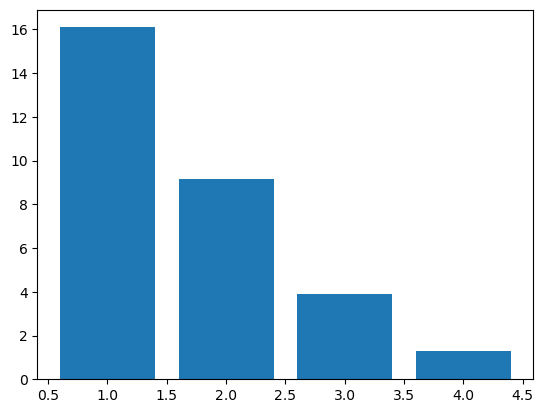

In [18]:
# Оцениваем сингулярные значения независимых компонент, чтобы понять сколько их взять в анализ
n_columns = len(X_train_scaled[0])
pca = PCA(n_components=n_columns)
pca.fit(X_train_scaled)
plt.bar(range(1, n_columns + 1), pca.singular_values_)

In [19]:
# Применение PCA только к тренировочным данным
pca = PCA(n_components=2)  # Оставляем 2 главные компоненты
X_train_pca = pca.fit_transform(X_train_scaled)
# Применение PCA к тестовым данным
X_test_pca = pca.transform(X_test_scaled)

У нас ограниченное количество данных (всего несколько десятков экземпляров), поэтому для подбора оптимальной модели мы будем использовать метод бутстрэппинга. Мы будем извлекать выборки с возвращением из обучающей выборки, обучать модель на этих выборках и рассчитывать точность предсказаний на тестовых данных. В качестве итоговой модели мы возьмем модель с усредненными коэффициентами, полученными по всем итерациям, а для оценки точности будем использовать среднюю оценку за все итерации.
измеряет общую точность модели, то есть процент правильно классифицированных объектов (как верно предсказанные положительные, так и отрицательные классы).
Точность предсказания (Accuracy) = (TP+TN) / (TP+TN+FP+FN)
Где:
TP (True Positives) — истинные положительные: положительные примеры, правильно предсказанные моделью.
TN (True Negatives) — истинные отрицательные: отрицательные примеры, правильно предсказанные моделью.
FP (False Positives) — ложноположительные: отрицательные примеры, ошибочно предсказанные как положительные.
FN (False Negatives) — ложноотрицательные: положительные примеры, ошибочно предсказанные как отрицательные.

In [20]:
# Параметры бутстрэппинга
n_iterations = 1000  # Количество итераций
accuracies = []  # Список для хранения точностей
coefficients_list = []  # Список для хранения коэффициентов
intercepts_list = []  # Список для хранения интерсептов
# Бутстрэппинг
for _ in range(n_iterations):
    # Случайная выборка с возвращением из тренировочных данных
    indices = np.random.choice(
        range(len(X_train_pca)), size=len(X_train_pca), replace=True)
    X_bootstrap = X_train_pca[indices]
    y_bootstrap = y_train[indices]

    # Обучение модели
    model = LogisticRegression(max_iter=1000)
    model.fit(X_bootstrap, y_bootstrap)

    # Оценка модели на тестовой выборке
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Сохранение точности и коэффициентов
    accuracies.append(accuracy)
    coefficients_list.append(model.coef_)

# Добавляем проверку на NaN для интерсепта
    if np.isnan(model.intercept_).any():
        intercepts_list.append(np.nan)  # Сохраняем NaN, если он есть
    else:
        intercepts_list.append(model.intercept_)

# Подсчет средней точности
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# Вычисление средних коэффициентов и интерсепта с использованием np.nanmean
mean_coefficients = np.mean(coefficients_list, axis=0)
# Используем nanmean для игнорирования NaN
mean_intercept = np.nanmean(intercepts_list, axis=0)

print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.3f}")
print("Mean Coefficients:")
print(mean_coefficients)
print(f"Mean Intercept: {mean_intercept}")

Mean Accuracy: 0.881
Standard Deviation of Accuracy: 0.029
Mean Coefficients:
[[-2.43390747  0.38782221]
 [-0.04658347 -0.41950656]
 [ 2.48049094  0.03168435]]
Mean Intercept: [-0.38664627  1.48062547 -1.0939792 ]


In [21]:
# Создание итоговой модели логистической регрессии
final_lr = LogisticRegression(multi_class='ovr', max_iter=1000)

# Установка классов
final_lr.classes_ = np.array([0, 1, 2])

# Установка коэффициентов и интерсептов
final_lr.coef_ = mean_coefficients
final_lr.intercept_ = mean_intercept

# Проверка, что все работает на тестовых данных
final_y_pred = final_lr.predict(X_test_pca)
print(final_y_pred)

[0 2 2 2 1 2 2 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2 0 0 1 1 1 0 0
 0 2 2 2 1 0 0 2 1 2 2 0 1 1 2 0 0 0 0 0 0 2 1]


# Байесовский классификатор

Исходные признаки имеют схожий порядок значений, и поскольку стандартизация не является строгой необходимостью при использовании наивного байесовского классификатора, мы можем опустить этот шаг. Однако у нас остается проблема с мультиколлинеарностью. Наивный байес предполагает, что все признаки независимы. Когда признаки коррелируют, это предположение нарушается, что может ухудшить качество предсказаний.
Мы можем использовать методы сокращения размерности, такие как PCA, которые помогут устранить мультиколлинеарность, так как главные компоненты будут ортогональными и независимыми. Либо можно применить байесовскую модель, устойчивую к корреляции, например, multivariate Gaussian Naive Bayes, которая способна работать с коррелированными признаками. Также важно отметить, что байесовский классификатор основан на предположении о том, что распределение признаков соответствует нормальному.
Для проверки этого предположения используем критерий Шапиро-Уилка, который проверяет нулевую гипотезу о соответствии распределения данных нормальному. Если уровень значимости выше 0,05, то мы не можем отклонить нулевую гипотезу и можем констатировать, что данные имеют нормальное распределение.

In [22]:
classes = iris_df.class_name.unique().tolist()
params = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for cl in classes:
    for pr in params:
        shapiro = stats.shapiro(iris_df.query('class_name == @cl')[pr].values)
        if shapiro.pvalue > 0.05:
            dest = 'соответствует нормальному'
        else:
            dest = 'НЕ соотвествует нормальному'
        print(f'Распределение {pr} у {cl} {dest}')
        print()

Распределение sepal_length у setosa соответствует нормальному

Распределение sepal_width у setosa соответствует нормальному

Распределение petal_length у setosa соответствует нормальному

Распределение petal_width у setosa НЕ соотвествует нормальному

Распределение sepal_length у versicolor соответствует нормальному

Распределение sepal_width у versicolor соответствует нормальному

Распределение petal_length у versicolor соответствует нормальному

Распределение petal_width у versicolor НЕ соотвествует нормальному

Распределение sepal_length у virginica соответствует нормальному

Распределение sepal_width у virginica соответствует нормальному

Распределение petal_length у virginica соответствует нормальному

Распределение petal_width у virginica соответствует нормальному



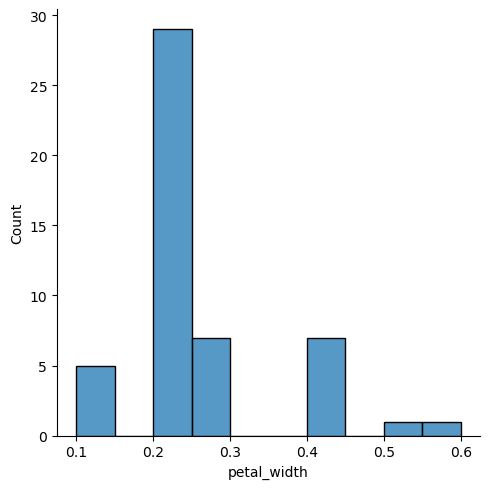

In [23]:
sns.displot(data=iris_df.query('class_name == "setosa"'), x='petal_width')

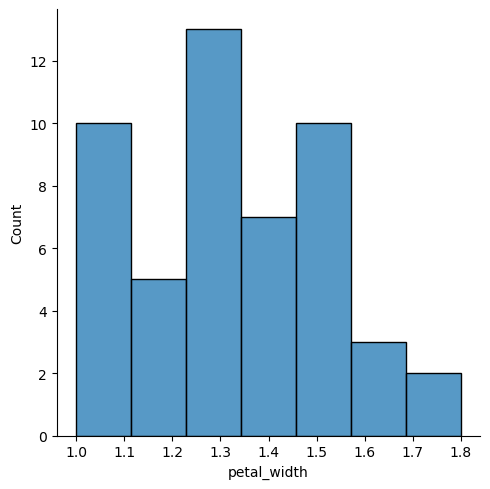

In [24]:
sns.displot(data=iris_df.query('class_name == "versicolor"'), x='petal_width')

Большая часть исследуемых признаков имеет нормальное распределение. Распределение двух признаков - ширины лепестков у setosa и versicolor - отличается от нормального. Но поскольку он в прнципе куполообразной формы, то будем считать что в этом случае возможно использовать байесовские методы классификации

In [25]:
# Инициируем и обучаем наивный байесовский класификатор на тестовой выборке
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# с помощью байесовского классификатора прогнозирум к какому классу относится цветок
y_pred_gnb = gnb.predict(X_test)
# Оцениваем точность классификации
accuracy_gnb = round((accuracy_score(y_test, y_pred_gnb) * 100), 2)
print(f'точность байесовского классификатора {accuracy_gnb }')

точность байесовского классификатора 96.67


# Случайный лес

Шкала признаков не влияет на процесс принятия решений в случае случайного леса, поскольку он основан на деревьях решений, которые делят пространство признаков на регионы на основе пороговых значений. Поэтому стандартизация данных не является необходимостью. Кроме того, случайный лес менее чувствителен к мультиколлинеарности, так как строит множество деревьев на случайных подмножествах признаков. Влияние коррелированных признаков уменьшается благодаря случайной выборке признаков на каждом этапе построения деревьев.

Определение параметров случайного леса — ключевой шаг для получения оптимальной модели, которая будет демонстрировать высокие результаты на тестовых данных. Существует несколько параметров, влияющих на производительность и точность модели случайного леса, такие как количество деревьев, глубина деревьев и минимальное количество образцов для разбиения. Для подбора параметров будем использовать метод поиска по сетке (GridSearchCV), который позволяет автоматически находить наилучшие параметры через исчерпывающий поиск по всем возможным комбинациям указанных параметров.

In [26]:
# Инициируем случайный лес
random_forest = RandomForestClassifier()

# Параметры, из которых будем выбирать
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

# Подбираем оптимальные параметры
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Используем найденные параметры
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [27]:
# Инициируем модель случайного леса с оптимальными параметрами
final_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Обучаем модель на тренировочных данных
final_rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = final_rf.predict(X_test)

# Расчитаем метрику точности
accuracy_rf = round((accuracy_score(y_test, y_pred_rf)) * 100, 2)
print(f'точность случайного леса {accuracy_rf}')

точность случайного леса 96.67


# Вывод

Байесовский классификатор и случайный лес демонстрируют более высокую точность классификации ирисов на три класса по сравнению с логистической регрессией. При этом байесовский классификатор основывается на фиксированных предположениях о распределении данных, что упрощает его применение. В то же время случайный лес требует настройки и обширного поиска по сетке параметров для оптимизации производительности, что является ресурсозатратной процедурой.